In [ ]:
import pandas as pd
import numpy as np

### Misellaneous Topics

##### 1. How to handle the duplicate entries?

In [ ]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

In [ ]:
data.duplicated()

In [ ]:
data.drop_duplicates()

In [ ]:
data['v1'] = range(7)
data

In [ ]:
data.duplicated(['k2', 'v1'])

In [ ]:
data.drop_duplicates(['k1'])

In [ ]:
data.drop_duplicates(['k1', 'k2'])

In [ ]:
data.drop_duplicates(['k1', 'k2'], keep='last')

##### 2. Transforming values by mapping

In [ ]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

In [ ]:
lowercased = data['food'].str.lower()
lowercased

In [ ]:
data['food'] = lowercased
data

In [ ]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [ ]:
data['animal'] = lowercased.map(meat_to_animal)

In [ ]:
data

##### 3. Replacing values

In [ ]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

In [ ]:
data.replace(-999, np.nan)

In [ ]:
data.replace([-999, -1000], 0)

In [ ]:
data.replace([-999, -1000], [999, 1000])

In [ ]:
data.dtype

##### 4. Axis renaming

In [ ]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

In [ ]:
data.index = data.index.map(lambda x : x.upper())
data

In [ ]:
data.columns

In [ ]:
data.rename(index=str.title, columns=str.upper)

In [ ]:
data.rename(index={'OHIO':'California'}, columns={'one':1, 'two':2, 'three':3, 'four': 4})

In [ ]:
data.columns=('a', 'b', 'c', 'd')
data

##### 5. Discreetization and binning

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [ ]:
bins = [18, 25, 35, 60, 100]

In [ ]:
cats = pd.cut(ages, bins)

In [ ]:
cats

In [ ]:
cats.codes

In [ ]:
cats.categories

In [ ]:
groups = ['Youth', 'Young Adult', 'Middle Aged', 'Senior']

In [ ]:
cats = pd.cut(ages, bins, labels=groups)

In [ ]:
cats

In [ ]:
data = np.random.randn(1000)

In [ ]:
min(data)

In [ ]:
max(data)

In [ ]:
cats = pd.qcut(data, 4)
cats

In [ ]:
pd.value_counts(cats)

In [ ]:
cats = pd.qcut(data, 10)
pd.value_counts(cats)

##### 5. Outliers

In [82]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.072589,-0.008734,0.000364,-0.022832
std,0.980357,0.968790,1.009875,0.981031
min,-3.376201,-2.951379,-3.053876,-2.876578
25%,-0.750996,-0.668407,-0.666486,-0.695222
50%,-0.057580,-0.022040,-0.019084,-0.024977
75%,0.580755,0.618539,0.681239,0.629729
max,3.979187,3.583788,2.783527,3.744535


In [ ]:
data.head()

In [ ]:
col = data[2]

In [ ]:
max(col)

In [ ]:
col[np.abs(col)>3]

In [ ]:
data[(np.abs(col)>3)]

In [ ]:
data[(np.abs(data)>3).any(1)]

In [ ]:
data.describe()

In [ ]:
(0.726400 + 0.648128) * 1.5

In [ ]:
data[(np.abs(data)>3).any(1)].index

In [ ]:
data.drop(data[(np.abs(data)>3).any(1)].index, inplace=True)

In [ ]:
data[(np.abs(data)>3).any(1)]

<AxesSubplot:>

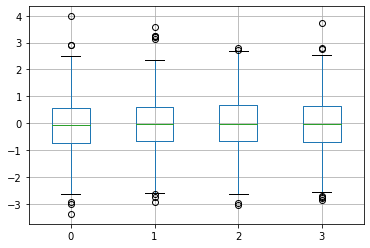

In [83]:
data.boxplot()